<a href="https://colab.research.google.com/github/rachitaka/age/blob/main/model(export_pkl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install flask-ngrok
%mkdir templates -p
%mkdir static/css -p

In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



In [50]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [51]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/dataset/train/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/dataset/validation/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')



Found 229 images belonging to 8 classes.
Found 151 images belonging to 8 classes.


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
train_dataset.class_indices

{'00-05': 0,
 '06-12': 1,
 '13-18': 2,
 '19-25': 3,
 '26-35': 4,
 '36-45': 5,
 '46-55': 6,
 '56-65': 7}

In [54]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

In [55]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='softmax')
                                    ])

In [56]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [58]:
model_fit = model.fit(train_dataset,
                      validation_data= validation_dataset,
                      epochs=10,
                      steps_per_epoch=len(train_dataset))

Epoch 1/10
77/77 [==============================] - 23s 305ms/step - loss: 2.0187 - accuracy: 0.8739 - val_loss: 1.9223 - val_accuracy: 0.8750
Epoch 2/10
77/77 [==============================] - 24s 306ms/step - loss: 1.9202 - accuracy: 0.8723 - val_loss: 1.7860 - val_accuracy: 0.8750
Epoch 3/10
77/77 [==============================] - 24s 312ms/step - loss: 1.7931 - accuracy: 0.8745 - val_loss: 1.7747 - val_accuracy: 0.8783
Epoch 4/10
77/77 [==============================] - 25s 319ms/step - loss: 1.6270 - accuracy: 0.8799 - val_loss: 1.3989 - val_accuracy: 0.8916
Epoch 5/10
77/77 [==============================] - 24s 315ms/step - loss: 1.3972 - accuracy: 0.8919 - val_loss: 1.1847 - val_accuracy: 0.9065
Epoch 6/10
77/77 [==============================] - 24s 313ms/step - loss: 1.1760 - accuracy: 0.9121 - val_loss: 1.0107 - val_accuracy: 0.9123
Epoch 7/10
77/77 [==============================] - 23s 304ms/step - loss: 0.8736 - accuracy: 0.9367 - val_loss: 0.4960 - val_accuracy: 0.9586

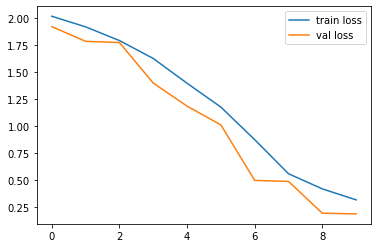

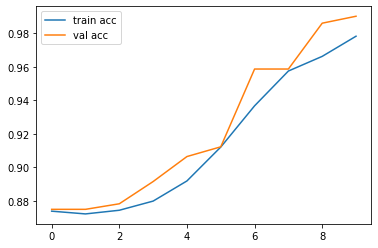

<Figure size 432x288 with 0 Axes>

In [59]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

val [[0. 0. 1. 0. 0. 0. 0. 0.]]
13-18


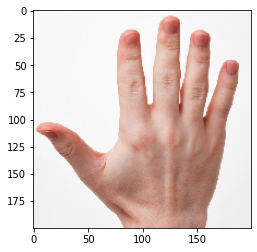

In [61]:
img=image.load_img('/content/drive/MyDrive/dataset/train/13-18/17_2.jpg',target_size=(200,200))
plt.imshow(img)
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
print("val %s"%val)
rach=val.argmax()
if rach==0:
  print("00-05")
if rach==1:
  print("06-12")
if rach==2:
  print("13-18")
if rach==3:
  print("19-25")
if rach==4:
  print("26-35")
if rach==5:
  print("36-45")
if rach==6:
  print("46-55")
if rach==7:
  print("56-65")
  




In [62]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


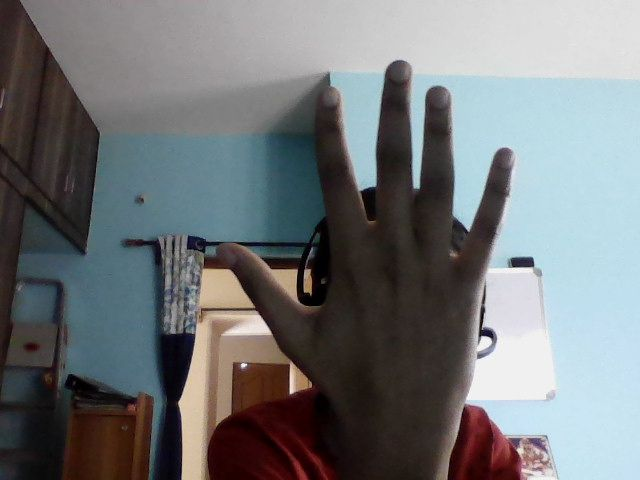

In [63]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

val [[0. 0. 0. 0. 1. 0. 0. 0.]]
26-35


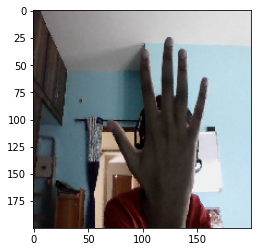

In [64]:
img=image.load_img('photo.jpg',target_size=(200,200))
plt.imshow(img)
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
print("val %s"%val)
rach=val.argmax()
if rach==0:
  print("00-05")
if rach==1:
  print("06-12")
if rach==2:
  print("13-18")
if rach==3:
  print("19-25")
if rach==4:
  print("26-35")
if rach==5:
  print("36-45")
if rach==6:
  print("46-55")
if rach==7:
  print("56-65")
  
